In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from keras.applications.vgg19 import VGG19
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar10
from keras.layers import Dense,Flatten,Input,Dropout,Activation
from keras.layers import Conv2D,MaxPooling2D,GlobalMaxPooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

num_classes=10

x_train = x_train.astype('float32')
x_t = x_test.astype('float32')

y_train = to_categorical(y_train,num_classes)
y_t = to_categorical(y_test,num_classes)

def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage, 48,48,3))
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

x_train = resize_img(x_train)
x_t =resize_img(x_t)



In [3]:
vgg = VGG19(include_top=False,weights=None,input_shape=(48,48,3))

vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [6]:
from tensorflow.keras.layers import BatchNormalization
from keras.initializers import he_normal

save_dlr = os.path.join(os.getcwd(), 'save_models')#存取文件的路徑
model_name = 'my_cifar10_model.h5'#命名存取的model

model = Sequential()

for layer in vgg.layers:#為空白模型添加圖層
    model.add(layer)
#下面是三層全連接層            
model.add(Flatten(name='Flatten'))
model.add(Dense(4096,name='cifa10_fuction'))#使用Dense新增全連接層，有4096個神經元
model.add(BatchNormalization())
model.add(Activation('relu'))#使用relu為激勵函式
model.add(Dense(4096,kernel_initializer=he_normal(),name='fuction2'))#使用Dense新增全連接層，有4096個神經元，初始化器設定為he_normal()
model.add(BatchNormalization())
model.add(Activation('relu'))#使用relu為激勵函式
model.add(Dense(10, name='predictions_cifa10'))#使用Dense新增全連接層，有10個神經元
model.add(BatchNormalization())
model.add(Activation('softmax'))#使用softmax為激勵函式
        
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)      

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
#設定優化器為adam，設定損失函式為categorical_crossentropy，設定metrics為accuracy
history = model.fit(x_train,y_train,validation_data=(x_t,y_t),validation_split=0.15,epochs=10,batch_size=100,verbose=2)
#使用x_train為訓練資料集，y_train為訓練目標集，設定validation_data為(test_X, test_y)，使用validation_split=0.15指定訓練集的一定比例數據作為驗證集，所有輸入資料需要跑10次，每100筆輸入資料更新一次參數。設定verbose為2
scores = model.evaluate(x_t,y_t)
print("正確率",scores[1])

model.save('my_cifar10_model.h5')
print('Save model at %s' %save_dlr,model_name)

Epoch 1/10
425/425 - 71s - loss: 1.9037 - accuracy: 0.2649 - val_loss: 3.0054 - val_accuracy: 0.1119
Epoch 2/10
425/425 - 67s - loss: 1.6653 - accuracy: 0.3586 - val_loss: 2.3725 - val_accuracy: 0.2363
Epoch 3/10
425/425 - 67s - loss: 1.4696 - accuracy: 0.4470 - val_loss: 1.4330 - val_accuracy: 0.4825
Epoch 4/10
425/425 - 67s - loss: 1.2769 - accuracy: 0.5341 - val_loss: 1.3188 - val_accuracy: 0.5419
Epoch 5/10
425/425 - 67s - loss: 1.1225 - accuracy: 0.6018 - val_loss: 1.1823 - val_accuracy: 0.5801
Epoch 6/10
425/425 - 67s - loss: 0.9948 - accuracy: 0.6506 - val_loss: 0.9507 - val_accuracy: 0.6620
Epoch 7/10
425/425 - 67s - loss: 0.8883 - accuracy: 0.6926 - val_loss: 0.9138 - val_accuracy: 0.6803
Epoch 8/10
425/425 - 67s - loss: 0.7931 - accuracy: 0.7270 - val_loss: 1.0252 - val_accuracy: 0.6527
Epoch 9/10
425/425 - 68s - loss: 0.6901 - accuracy: 0.7654 - val_loss: 0.8769 - val_accuracy: 0.7091
Epoch 10/10
425/425 - 68s - loss: 0.5997 - accuracy: 0.8002 - val_loss: 0.8134 - val_accura

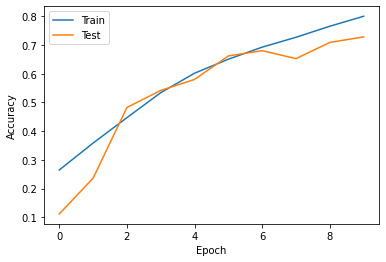

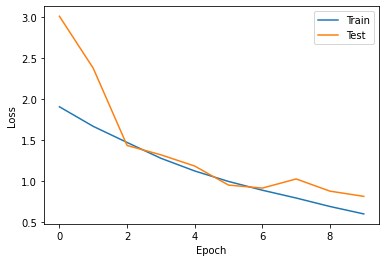

In [8]:
#繪製模組正確率與損失值圖
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

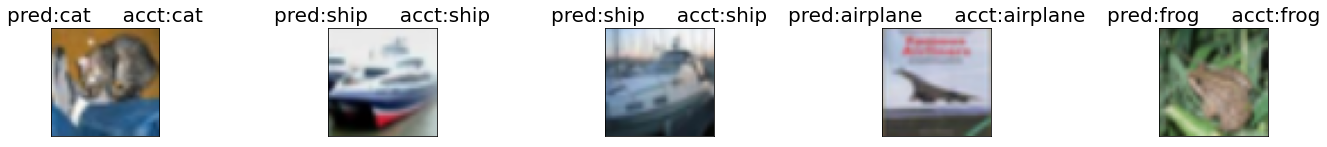

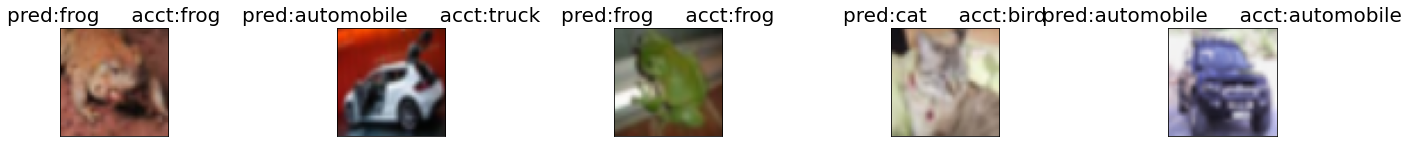

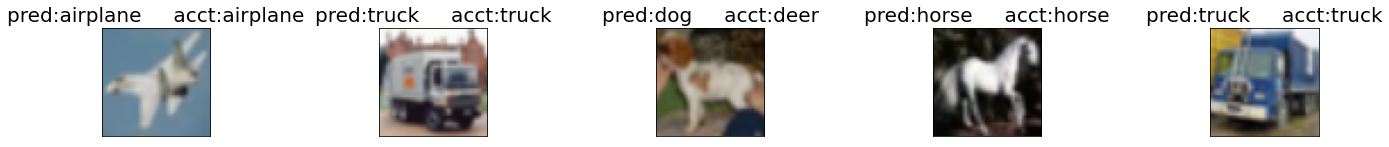

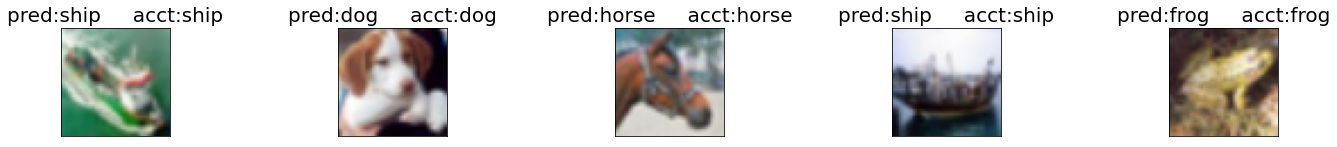

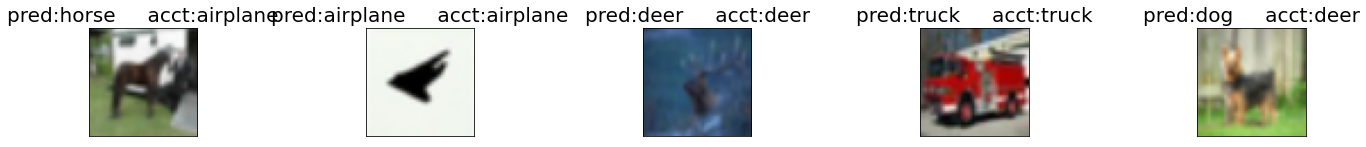

In [9]:
pred_y = model.predict(x_t)
pred_y = np.argmax(pred_y,axis=1)
y_t = y_test.flatten()

model = load_model('my_cifar10_model.h5')
dic = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
def draw_pic(pics, y, pred_y, index): #自訂函式draw_pic用於顯示圖片，每列5張圖片，並標示原始分類與辨識後分類
    for i in range(5):
        fig=plt.gcf()
        fig.set_size_inches(24,2)
        ax=plt.subplot(1,5,i+1)
        ax.imshow(np.reshape(pics[index+i],(48,48,3)).astype("uint8"), cmap='binary')
        title="pred:" + str(dic[y[index+i]])
        title+="     acct:" + str(dic[pred_y[index+i]])
        ax.set_title(title,fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()   

for i in range(0,25,5):#顯示前25個圖片到螢幕上
    draw_pic(x_t,y_t,pred_y,i)